<!-- dom:TITLE: PHY321: Two-body problems and Gravitational Forces -->
# PHY321: Two-body problems and Gravitational Forces
<!-- dom:AUTHOR: [Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/) at Department of Physics and Astronomy and Facility for Rare Ion Beams (FRIB), Michigan State University, USA & Department of Physics, University of Oslo, Norway -->
<!-- Author: -->  
**[Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/)**, Department of Physics and Astronomy and Facility for Rare Ion Beams (FRIB), Michigan State University, USA and Department of Physics, University of Oslo, Norway

Date: **Mar 22, 2021**

Copyright 1999-2021, [Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/). Released under CC Attribution-NonCommercial 4.0 license




## Aims and Overarching Motivation


### Monday

1. Computational topics: functions and classes (continuation of Julie's lecture from last Friday).

2. From the harmonic oscillator to the gravitational force and Kepler's laws

**Reading suggestion**: Taylor section 8.4 and Lecture notes


### Wednesday

1. Discussion of elliptical orbits and Kepler's laws

**Reading suggestion**: Taylor sections  8.5-8.8

### Friday

1. Physical interpretation of various orbit types and start discussion two-body scattering

**Reading suggestion**: Taylor section 8.5-8.8 and sections 14.1-14.2 




## Deriving Elliptical Orbits

Kepler's laws state that a gravitational orbit should be an ellipse
with the source of the gravitational field at one focus. Deriving this
is surprisingly messy. To do this, we first use angular momentum
conservation to transform the equations of motion so that it is in
terms of $r$ and $\theta$ instead of $r$ and $t$. The overall strategy
is to


1. Find equations of motion for $r$ and $t$ with no angle ($\theta$) mentioned, i.e. $d^2r/dt^2=\cdots$. Angular momentum conservation will be used, and the equation will involve the angular momentum $L$.

2. Use angular momentum conservation to find an expression for $\dot{\theta}$ in terms of $r$.

3. Use the chain rule to convert the equations of motions for $r$, an expression involving $r,\dot{r}$ and $\ddot{r}$, to one involving $r,dr/d\theta$ and $d^2r/d\theta^2$. This is quitecomplicated because the expressions will also involve a substitution $u=1/r$ so that one finds an expression in terms of $u$ and $\theta$.

4. Once $u(\theta)$ is found, you need to show that this can be converted to the familiar form for an ellipse.

The equations of motion give

<!-- Equation labels as ordinary links -->
<div id="eq:radialeqofmotion"></div>

$$
\begin{eqnarray}
\label{eq:radialeqofmotion} \tag{1}
\frac{d}{dt}r^2&=&\frac{d}{dt}(x^2+y^2)=2x\dot{x}+2y\dot{y}=2r\dot{r},\\
\nonumber
\dot{r}&=&\frac{x}{r}\dot{x}+\frac{y}{r}\dot{y},\\
\nonumber
\ddot{r}&=&\frac{x}{r}\ddot{x}+\frac{y}{r}\ddot{y}
+\frac{\dot{x}^2+\dot{y}^2}{r}
-\frac{\dot{r}^2}{r}.
\end{eqnarray}
$$

Recognizing that the numerator of the third term is the velocity squared, and that it can be written in polar coordinates,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
v^2=\dot{x}^2+\dot{y}^2=\dot{r}^2+r^2\dot{\theta}^2,
\label{_auto1} \tag{2}
\end{equation}
$$

one can write $\ddot{r}$ as

<!-- Equation labels as ordinary links -->
<div id="eq:radialeqofmotion2"></div>

$$
\begin{eqnarray}
\label{eq:radialeqofmotion2} \tag{3}
\ddot{r}&=&\frac{F_x\cos\theta+F_y\sin\theta}{m}+\frac{\dot{r}^2+r^2\dot{\theta}^2}{r}-\frac{\dot{r}^2}{r}\\
\nonumber
&=&\frac{F}{m}+\frac{r^2\dot{\theta}^2}{r}\\
\nonumber
m\ddot{r}&=&F+\frac{L^2}{mr^3}.
\end{eqnarray}
$$

This derivation used the fact that the force was radial,
$F=F_r=F_x\cos\theta+F_y\sin\theta$, and that angular momentum is
$L=mrv_{\theta}=mr^2\dot{\theta}$. The term $L^2/mr^3=mv^2/r$ behaves
like an additional force. Sometimes this is referred to as a
centrifugal force, but it is not a force. Instead, it is the
consequence of considering the motion in a rotating (and therefore
accelerating) frame.

Now, we switch to the particular case of an attractive inverse square
force, $F=-\alpha/r^2$, and show that the trajectory, $r(\theta)$, is
an ellipse. To do this we transform derivatives w.r.t. time to
derivatives w.r.t. $\theta$ using the chain rule combined with angular
momentum conservation, $\dot{\theta}=L/mr^2$.

<!-- Equation labels as ordinary links -->
<div id="eq:rtotheta"></div>

$$
\begin{eqnarray}
\label{eq:rtotheta} \tag{4}
\dot{r}&=&\frac{dr}{d\theta}\dot{\theta}=\frac{dr}{d\theta}\frac{L}{mr^2},\\
\nonumber
\ddot{r}&=&\frac{d^2r}{d\theta^2}\dot{\theta}^2
+\frac{dr}{d\theta}\left(\frac{d}{dr}\frac{L}{mr^2}\right)\dot{r}\\
\nonumber
&=&\frac{d^2r}{d\theta^2}\left(\frac{L}{mr^2}\right)^2
-2\frac{dr}{d\theta}\frac{L}{mr^3}\dot{r}\\
\nonumber
&=&\frac{d^2r}{d\theta^2}\left(\frac{L}{mr^2}\right)^2
-\frac{2}{r}\left(\frac{dr}{d\theta}\right)^2\left(\frac{L}{mr^2}\right)^2
\end{eqnarray}
$$

Equating the two expressions for $\ddot{r}$ in Eq.s ([3](#eq:radialeqofmotion2)) and ([4](#eq:rtotheta)) eliminates all the derivatives w.r.t. time, and provides a differential equation with only derivatives w.r.t. $\theta$,

<!-- Equation labels as ordinary links -->
<div id="eq:rdotdot"></div>

$$
\begin{equation}
\label{eq:rdotdot} \tag{5}
\frac{d^2r}{d\theta^2}\left(\frac{L}{mr^2}\right)^2
-\frac{2}{r}\left(\frac{dr}{d\theta}\right)^2\left(\frac{L}{mr^2}\right)^2
=\frac{F}{m}+\frac{L^2}{m^2r^3},
\end{equation}
$$

that when solved yields the trajectory, i.e. $r(\theta)$. Up to this
point the expressions work for any radial force, not just forces that
fall as $1/r^2$.

The trick to simplifying this differential equation for the inverse
square problems is to make a substitution, $u\equiv 1/r$, and rewrite
the differential equation for $u(\theta)$.

$$
\begin{eqnarray}
r&=&1/u,\\
\nonumber
\frac{dr}{d\theta}&=&-\frac{1}{u^2}\frac{du}{d\theta},\\
\nonumber
\frac{d^2r}{d\theta^2}&=&\frac{2}{u^3}\left(\frac{du}{d\theta}\right)^2-\frac{1}{u^2}\frac{d^2u}{d\theta^2}.
\end{eqnarray}
$$

Plugging these expressions into Eq. ([5](#eq:rdotdot)) gives an
expression in terms of $u$, $du/d\theta$, and $d^2u/d\theta^2$. After
some tedious algebra,

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
\frac{d^2u}{d\theta^2}=-u-\frac{F m}{L^2u^2}.
\label{_auto2} \tag{6}
\end{equation}
$$

For the attractive inverse square law force, $F=-\alpha u^2$,

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\frac{d^2u}{d\theta^2}=-u+\frac{m\alpha}{L^2}.
\label{_auto3} \tag{7}
\end{equation}
$$

The solution has two arbitrary constants, $A$ and $\theta_0$,

<!-- Equation labels as ordinary links -->
<div id="eq:Ctrajectory"></div>

$$
\begin{eqnarray}
\label{eq:Ctrajectory} \tag{8}
u&=&\frac{m\alpha}{L^2}+A\cos(\theta-\theta_0),\\
\nonumber
r&=&\frac{1}{(m\alpha/L^2)+A\cos(\theta-\theta_0)}.
\end{eqnarray}
$$

The radius will be at a minimum when $\theta=\theta_0$ and at a
maximum when $\theta=\theta_0+\pi$. The constant $A$ is related to the
eccentricity of the orbit. When $A=0$ the radius is a constant
$r=L^2/(m\alpha)$, and the motion is circular. If one solved the
expression $mv^2/r=-\alpha/r^2$ for a circular orbit, using the
substitution $v=L/(mr)$, one would reproduce the expression
$r=L^2/(m\alpha)$.

The form describing the elliptical trajectory in
Eq. ([8](#eq:Ctrajectory)) can be identified as an ellipse with one
focus being the center of the ellipse by considering the definition of
an ellipse as being the points such that the sum of the two distances
between the two foci are a constant. Making that distance $2D$, the
distance between the two foci as $2a$, and putting one focus at the
origin,

$$
\begin{eqnarray}
2D&=&r+\sqrt{(r\cos\theta-2a)^2+r^2\sin^2\theta},\\
\nonumber
4D^2+r^2-4Dr&=&r^2+4a^2-4ar\cos\theta,\\
\nonumber
r&=&\frac{D^2-a^2}{D+a\cos\theta}=\frac{1}{D/(D^2-a^2)-a\cos\theta/(D^2-a^2)}.
\end{eqnarray}
$$

By inspection, this is the same form as Eq. ([8](#eq:Ctrajectory)) with $D/(D^2-a^2)=m\alpha/L^2$ and $a/(D^2-a^2)=A$.


Let us remind ourselves about what an ellipse is before we proceed.

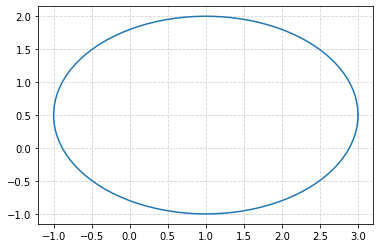

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()

## Effective or Centrifugal Potential

The total energy of a particle is

$$
\begin{eqnarray}
E&=&V(r)+\frac{1}{2}mv_\theta^2+\frac{1}{2}m\dot{r}^2\\
\nonumber
&=&V(r)+\frac{1}{2}mr^2\dot{\theta}^2+\frac{1}{2}m\dot{r}^2\\
\nonumber
&=&V(r)+\frac{L^2}{2mr^2}+\frac{1}{2}m\dot{r}^2.
\end{eqnarray}
$$

The second term then contributes to the energy like an additional
repulsive potential. The term is sometimes referred to as the
"centrifugal" potential, even though it is actually the kinetic energy
of the angular motion. Combined with $V(r)$, it is sometimes referred
to as the "effective" potential,

$$
\begin{eqnarray}
V_{\rm eff}(r)&=&V(r)+\frac{L^2}{2mr^2}.
\end{eqnarray}
$$

Note that if one treats the effective potential like a real potential, one would expect to be able to generate an effective force,

$$
\begin{eqnarray}
F_{\rm eff}&=&-\frac{d}{dr}V(r) -\frac{d}{dr}\frac{L^2}{2mr^2}\\
\nonumber
&=&F(r)+\frac{L^2}{mr^3}=F(r)+m\frac{v_\perp^2}{r},
\end{eqnarray}
$$

which is indeed matches the form for $m\ddot{r}$ in Eq. ([3](#eq:radialeqofmotion2)), which included the **centrifugal** force.

The following code plots this effective potential for a simple choice of parameters, with a standard gravitational potential $-\alpha/r$. Here we have chosen $L=m=\alpha=1$.

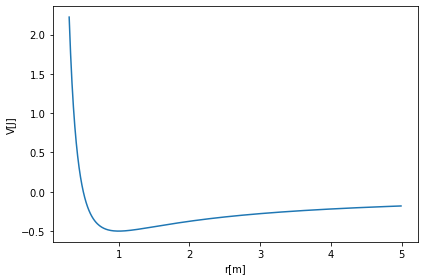

In [2]:
# Common imports
import numpy as np
from math import *
import matplotlib.pyplot as plt

Deltax = 0.01
#set up arrays
xinitial = 0.3
xfinal = 5.0
alpha = 1.0   # spring constant
m = 1.0   # mass, you can change these
AngMom = 1.0  #  The angular momentum
n = ceil((xfinal-xinitial)/Deltax)
x = np.zeros(n)
for i in range(n):
    x[i] = xinitial+i*Deltax
V = np.zeros(n)
V = -alpha/x+0.5*AngMom*AngMom/(m*x*x)
# Plot potential
fig, ax = plt.subplots()
ax.set_xlabel('r[m]')
ax.set_ylabel('V[J]')
ax.plot(x, V)
fig.tight_layout()
plt.show()

### Gravitational force example

Using the above parameters, we can now study the evolution of the system using for example the velocity Verlet method.
This is done in the code here for an initial radius equal to the minimum of the potential well.  We seen then that the radius is always the same and corresponds to a circle (the radius is always constant).

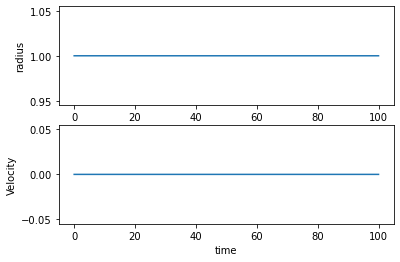

In [9]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


# Simple Gravitational Force   -alpha/r
    
DeltaT = 0.01
#set up arrays 
tfinal = 100.0
n = ceil(tfinal/DeltaT)
# set up arrays for t, v and r
t = np.zeros(n)
v = np.zeros(n)
r = np.zeros(n)
# Constants of the model, setting all variables to one for simplicity
alpha = 1.0
AngMom = 1.0  #  The angular momentum
m = 1.0  # scale mass to one
c1 = AngMom*AngMom/(m*m)
c2 = AngMom*AngMom/m
rmin = (AngMom*AngMom/m/alpha)
# Initial conditions
r0 = rmin
v0 = 0.0
r[0] = r0
v[0] = v0
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up acceleration
    a = -alpha/(r[i]**2)+c1/(r[i]**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -alpha/(r[i+1]**2)+c1/(r[i+1]**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
    # Plot position as function of time
fig, ax = plt.subplots(2,1)
ax[0].set_xlabel('time')
ax[0].set_ylabel('radius')
ax[0].plot(t,r)
ax[1].set_xlabel('time')
ax[1].set_ylabel('Velocity')
ax[1].plot(t,v)
save_fig("RadialGVV")
plt.show()

Changing the value of the initial position to a value where the energy is positive, leads to an increasing radius with time, a so-called unbound orbit. Choosing on the other hand an initial radius that corresponds to a negative energy and different from the minimum value leads to a radius that oscillates back and forth between two values. 

### Harmonic Oscillator in two dimensions

Consider a particle of mass $m$ in a 2-dimensional harmonic oscillator with potential

$$
V=\frac{1}{2}kr^2=\frac{1}{2}k(x^2+y^2).
$$

If the orbit has angular momentum $L$, we can find the radius and angular velocity of the circular orbit as well as the b) the angular frequency of small radial perturbations.

We consider the effective potential. The radius of a circular orbit is at the minimum of the potential (where the effective force is zero).
The potential is plotted here with the parameters $k=m=0.1$ and $L=1.0$.

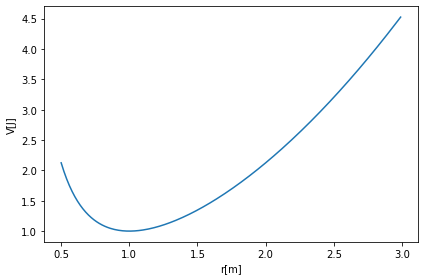

In [10]:
# Common imports
import numpy as np
from math import *
import matplotlib.pyplot as plt

Deltax = 0.01
#set up arrays
xinitial = 0.5
xfinal = 3.0
k = 1.0   # spring constant
m = 1.0   # mass, you can change these
AngMom = 1.0  #  The angular momentum
n = ceil((xfinal-xinitial)/Deltax)
x = np.zeros(n)
for i in range(n):
    x[i] = xinitial+i*Deltax
V = np.zeros(n)
V = 0.5*k*x*x+0.5*AngMom*AngMom/(m*x*x)
# Plot potential
fig, ax = plt.subplots()
ax.set_xlabel('r[m]')
ax.set_ylabel('V[J]')
ax.plot(x, V)
fig.tight_layout()
plt.show()

$$
\begin{eqnarray*}
V_{\rm eff}&=&\frac{1}{2}kr^2+\frac{L^2}{2mr^2}
\end{eqnarray*}
$$

The effective potential looks like that of a harmonic oscillator for
large $r$, but for small $r$, the centrifugal potential repels the
particle from the origin. The combination of the two potentials has a
minimum for at some radius $r_{\rm min}$.

$$
\begin{eqnarray*}
0&=&kr_{\rm min}-\frac{L^2}{mr_{\rm min}^3},\\
r_{\rm min}&=&\left(\frac{L^2}{mk}\right)^{1/4},\\
\dot{\theta}&=&\frac{L}{mr_{\rm min}^2}=\sqrt{k/m}.
\end{eqnarray*}
$$

For particles at $r_{\rm min}$ with $\dot{r}=0$, the particle does not
accelerate and $r$ stays constant, i.e. a circular orbit. The radius
of the circular orbit can be adjusted by changing the angular momentum
$L$.

For the above parameters this minimum is at $r_{\rm min}=1$.

 Now consider small vibrations about $r_{\rm min}$. The effective spring constant is the curvature of the effective potential.

$$
\begin{eqnarray*}
k_{\rm eff}&=&\left.\frac{d^2}{dr^2}V_{\rm eff}(r)\right|_{r=r_{\rm min}}=k+\frac{3L^2}{mr_{\rm min}^4}\\
&=&4k,\\
\omega&=&\sqrt{k_{\rm eff}/m}=2\sqrt{k/m}=2\dot{\theta}.
\end{eqnarray*}
$$

Because the radius oscillates with twice the angular frequency,
the orbit has two places where $r$ reaches a minimum in one
cycle. This differs from the inverse-square force where there is one
minimum in an orbit. One can show that the orbit for the harmonic
oscillator is also elliptical, but in this case the center of the
potential is at the center of the ellipse, not at one of the foci.

The solution is also simple to write down exactly in Cartesian coordinates. The $x$ and $y$ equations of motion separate,

$$
\begin{eqnarray*}
\ddot{x}&=&-kx,\\
\ddot{y}&=&-ky.
\end{eqnarray*}
$$

The general solution can be expressed as

$$
\begin{eqnarray*}
x&=&A\cos\omega_0 t+B\sin\omega_0 t,\\
y&=&C\cos\omega_0 t+D\sin\omega_0 t.
\end{eqnarray*}
$$

The code here finds the solution for $x$ and $y$ using the code we
developed in homework 5 and 6 and the midterm.  Note that this code is
tailored to run in Cartesian coordinates. There is thus no angular
momentum dependent term.

Here we have chose initial conditions that
correspond to the minimum of the effective potential
$r_{\mathrm{min}}$. We have chosen $x_0=r_{\mathrm{min}}$ and
$y_0=0$. Similarly, we use the centripetal acceleration to determine
the initial velocity so that we have a circular motion (see back to the
last question of the midterm). This means that we set the centripetal
acceleration $v^2/r$ equal to the force from the harmonic oscillator $-k\boldsymbol{r}$. Taking the
magnitude of $\boldsymbol{r}$ we have then
$v^2/r=k/mr$, which gives $v=\pm\omega_0r$. 

Since the code here solves the equations of motion in cartesian
coordinates and the harmonic oscillator potential leads to forces in
the $x$- and $y$-directions that are decoupled, we have to select the initial velocities and positions so that we don't get that for example $y(t)=0$.

We set $x_0$ to be different from zero and $v_{y0}$ to be different from zero.

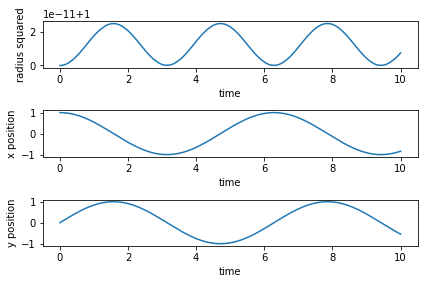

In [13]:

DeltaT = 0.00001
#set up arrays 
tfinal = 10.0
n = ceil(tfinal/DeltaT)
# set up arrays
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
radius = np.zeros(n)
# Constants of the model
k = 1.0   # spring constant
m = 1.0   # mass, you can change these
omega02 = k/m  # Frequency
AngMom = 1.0  #  The angular momentum
# Potential minimum
rmin = (AngMom*AngMom/k/m)**0.25
# Initial conditions as compact 2-dimensional arrays, x0=rmin and y0 = 0
x0 = rmin; y0= 0.0
r0 = np.array([x0,y0])
#vy0 = 2.0 ; vx0 = 0.0 
vy0 = sqrt(omega02)*rmin; vx0 = 0.0
v0 = np.array([vx0,vy0])
r[0] = r0
v[0] = v0
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up the acceleration
    a =  -r[i]*omega02  
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -r[i+1]*omega02  
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
# Plot position as function of time
radius = np.sqrt(r[:,0]**2+r[:,1]**2)
fig, ax = plt.subplots(3,1)
ax[0].set_xlabel('time')
ax[0].set_ylabel('radius squared')
ax[0].plot(t,r[:,0]**2+r[:,1]**2)
ax[1].set_xlabel('time')
ax[1].set_ylabel('x position')
ax[1].plot(t,r[:,0])
ax[2].set_xlabel('time')
ax[2].set_ylabel('y position')
ax[2].plot(t,r[:,1])

fig.tight_layout()
save_fig("2DimHOVV")
plt.show()

We see that the radius (to within a given error), we obtain a constant radius.


The following code shows first how we can solve this problem using the radial degrees of freedom only.
Here we need to add the explicit centrifugal barrier.  Note that the variable $r$ depends only on time. There is no $x$ and $y$ directions
since we have transformed the equations to polar coordinates.

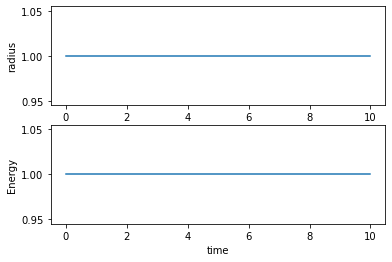

In [3]:
DeltaT = 0.01
#set up arrays 
tfinal = 10.0
n = ceil(tfinal/DeltaT)
# set up arrays for t, v and r
t = np.zeros(n)
v = np.zeros(n)
r = np.zeros(n)
E = np.zeros(n)
# Constants of the model
AngMom = 1.0  #  The angular momentum
m = 1.0
k = 1.0
omega02 = k/m
c1 = AngMom*AngMom/(m*m)
c2 = AngMom*AngMom/m
rmin = (AngMom*AngMom/k/m)**0.25
# Initial conditions
r0 = rmin
v0 = 0.0
r[0] = r0
v[0] = v0
E[0] = 0.5*m*v0*v0+0.5*k*r0*r0+0.5*c2/(r0*r0)
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up acceleration
    a = -r[i]*omega02+c1/(r[i]**3)    
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -r[i+1]*omega02+c1/(r[i+1]**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
    E[i+1] = 0.5*m*v[i+1]*v[i+1]+0.5*k*r[i+1]*r[i+1]+0.5*c2/(r[i+1]*r[i+1])
    # Plot position as function of time
fig, ax = plt.subplots(2,1)
ax[0].set_xlabel('time')
ax[0].set_ylabel('radius')
ax[0].plot(t,r)
ax[1].set_xlabel('time')
ax[1].set_ylabel('Energy')
ax[1].plot(t,E)
save_fig("RadialHOVV")
plt.show()

With some work using double angle formulas, one can calculate

$$
\begin{eqnarray*}
r^2&=&x^2+y^2\\
\nonumber
&=&(A^2+C^2)\cos^2(\omega_0t)+(B^2+D^2)\sin^2\omega_0t+(AB+CD)\cos(\omega_0t)\sin(\omega_0t)\\
\nonumber
&=&\alpha+\beta\cos 2\omega_0 t+\gamma\sin 2\omega_0 t,\\
\alpha&=&\frac{A^2+B^2+C^2+D^2}{2},~~\beta=\frac{A^2-B^2+C^2-D^2}{2},~~\gamma=AB+CD,\\
r^2&=&\alpha+(\beta^2+\gamma^2)^{1/2}\cos(2\omega_0 t-\delta),~~~\delta=\arctan(\gamma/\beta),
\end{eqnarray*}
$$

and see that radius oscillates with frequency $2\omega_0$. The
factor of two comes because the oscillation $x=A\cos\omega_0t$ has two
maxima for $x^2$, one at $t=0$ and one a half period later.




## Stability of Orbits

The effective force can be extracted from the effective potential, $V_{\rm eff}$. Beginning from the equations of motion, Eq. ([1](#eq:radialeqofmotion)), for $r$,

$$
\begin{eqnarray}
m\ddot{r}&=&F+\frac{L^2}{mr^3}\\
\nonumber
&=&F_{\rm eff}\\
\nonumber
&=&-\partial_rV_{\rm eff},\\
\nonumber
F_{\rm eff}&=&-\partial_r\left[V(r)+(L^2/2mr^2)\right].
\end{eqnarray}
$$

For a circular orbit, the radius must be fixed as a function of time,
so one must be at a maximum or a minimum of the effective
potential. However, if one is at a maximum of the effective potential
the radius will be unstable. For the attractive Coulomb force the
effective potential will be dominated by the $-\alpha/r$ term for
large $r$ because the centrifugal part falls off more quickly, $\sim
1/r^2$. At low $r$ the centrifugal piece wins and the effective
potential is repulsive. Thus, the potential must have a minimum
somewhere with negative potential. The circular orbits are then stable
to perturbation.


The effective potential is sketched for two cases, a $1/r$ attractive
potential and a $1/r^3$ attractive potential. The $1/r$ case has a
stable minimum, whereas the circular orbit in the $1/r^3$ case is
unstable.


If one considers a potential that falls as $1/r^3$, the situation is
reversed and the point where $\partial_rV$ disappears will be a local
maximum rather than a local minimum. **Fig to come here with code**

The repulsive centrifugal piece dominates at large $r$ and the attractive
Coulomb piece wins out at small $r$. The circular orbit is then at a
maximum of the effective potential and the orbits are unstable. It is
the clear that for potentials that fall as $r^n$, that one must have
$n>-2$ for the orbits to be stable.


Consider a potential $V(r)=\beta r$. For a particle of mass $m$ with
angular momentum $L$, find the angular frequency of a circular
orbit. Then find the angular frequency for small radial perturbations.


For the circular orbit you search for the position $r_{\rm min}$ where the effective potential is minimized,

$$
\begin{eqnarray*}
\partial_r\left\{\beta r+\frac{L^2}{2mr^2}\right\}&=&0,\\
\beta&=&\frac{L^2}{mr_{\rm min}^3},\\
r_{\rm min}&=&\left(\frac{L^2}{\beta m}\right)^{1/3},\\
\dot{\theta}&=&\frac{L}{mr_{\rm min}^2}=\frac{\beta^{2/3}}{(mL)^{1/3}}
\end{eqnarray*}
$$

Now, we can find the angular frequency of small perturbations about the circular orbit. To do this we find the effective spring constant for the effective potential,

$$
\begin{eqnarray*}
k_{\rm eff}&=&\partial_r^2 \left.V_{\rm eff}\right|_{r_{\rm min}}\\
&=&\frac{3L^2}{mr_{\rm min}^4},\\
\omega&=&\sqrt{\frac{k_{\rm eff}}{m}}\\
&=&\frac{\beta^{2/3}}{(mL)^{1/3}}\sqrt{3}.
\end{eqnarray*}
$$

If the two frequencies, $\dot{\theta}$ and $\omega$, differ by an
integer factor, the orbit's trajectory will repeat itself each time
around. This is the case for the inverse-square force,
$\omega=\dot{\theta}$, and for the harmonic oscillator,
$\omega=2\dot{\theta}$. In this case, $\omega=\sqrt{3}\dot{\theta}$,
and the angles at which the maxima and minima occur change with each
orbit.


### Code example with gravitional force

The code example here is meant to illustrate how we can make a plot of the final orbit. We solve the equations in polar coordinates (the example here uses the minimum of the potential as initial value) and then we transform back to cartesian coordinates and plot $x$ versus $y$. We see that we get a perfect circle when we place ourselves at the minimum of the potential energy, as expected.

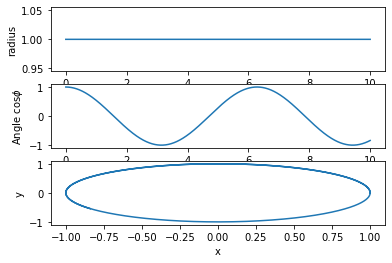

In [4]:

# Simple Gravitational Force   -alpha/r
    
DeltaT = 0.001
#set up arrays 
tfinal = 10.0
n = ceil(tfinal/DeltaT)
# set up arrays for t, v and r
t = np.zeros(n)
v = np.zeros(n)
r = np.zeros(n)
phi = np.zeros(n)
x = np.zeros(n)
y = np.zeros(n)
# Constants of the model, setting all variables to one for simplicity
alpha = 1.0
AngMom = 1.0  #  The angular momentum
m = 1.0  # scale mass to one
c1 = AngMom*AngMom/(m*m)
c2 = AngMom*AngMom/m
rmin = (AngMom*AngMom/m/alpha)
# Initial conditions, place yourself at the potential min
r0 = rmin
v0 = 0.0  # starts at rest
r[0] = r0
v[0] = v0
phi[0] = 0.0
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up acceleration
    a = -alpha/(r[i]**2)+c1/(r[i]**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    anew = -alpha/(r[i+1]**2)+c1/(r[i+1]**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    t[i+1] = t[i] + DeltaT
    phi[i+1] = t[i+1]*c2/(r0**2)
# Find cartesian coordinates for easy plot    
x = r*np.cos(phi)
y = r*np.sin(phi)
fig, ax = plt.subplots(3,1)
ax[0].set_xlabel('time')
ax[0].set_ylabel('radius')
ax[0].plot(t,r)
ax[1].set_xlabel('time')
ax[1].set_ylabel('Angle $\cos{\phi}$')
ax[1].plot(t,np.cos(phi))
ax[2].set_ylabel('y')
ax[2].set_xlabel('x')
ax[2].plot(x,y)

save_fig("Phasespace")
plt.show()

Try to change the initial value for $r$ and see what kind of orbits you get.
In order to test different energies, it can be useful to look at the plot of the effective potential discussed above.

However, for orbits different from a circle the above code would need modifications in order to allow us to display say an ellipse. For the latter, it is much easier to run our code in cartesian coordinates, as done here. In this code we test also energy conservation and see that it is conserved to numerical precision. The code here is a simple extension of the code we developed for homework 4.

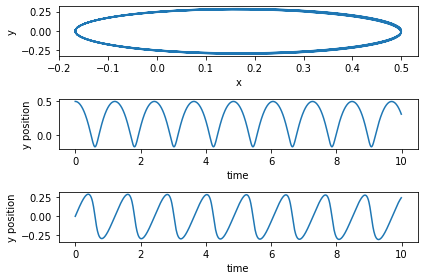

[-1.5        -1.49999996 -1.49999984 -1.49999964 -1.49999935 -1.49999898
 -1.49999853 -1.49999798 -1.49999734 -1.49999659 -1.49999574 -1.49999478
 -1.49999369 -1.49999247 -1.49999112 -1.49998961 -1.49998794 -1.49998609
 -1.49998404 -1.49998178 -1.49997929 -1.49997654 -1.49997351 -1.49997017
 -1.49996649 -1.49996243 -1.49995796 -1.49995304 -1.49994762 -1.49994165
 -1.49993508 -1.49992786 -1.49991994 -1.49991127 -1.4999018  -1.49989151
 -1.49988041 -1.49986852 -1.49985595 -1.49984292 -1.49982978 -1.49981712
 -1.49980588 -1.49979754 -1.49979431 -1.49979958 -1.4998184  -1.4998583
 -1.49993028 -1.50005034 -1.50024115 -1.500534   -1.50097003 -1.50159939
 -1.50247522 -1.50363822 -1.5050881  -1.50674417 -1.50841251 -1.50979454
 -1.51056842 -1.5105255  -1.50967788 -1.5082518  -1.50657253 -1.50493047
 -1.50350752 -1.50237442 -1.50152565 -1.50091821 -1.50049876 -1.50021789
 -1.50003547 -1.49992116 -1.49985304 -1.4998157  -1.49979853 -1.49979431
 -1.49979819 -1.49980692 -1.49981835 -1.49983109 -1.

In [6]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

DeltaT = 0.01
#set up arrays 
tfinal = 10.0
n = ceil(tfinal/DeltaT)
# set up arrays
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
E = np.zeros(n)
# Constants of the model
m = 1.0   # mass, you can change these
alpha = 1.0
# Initial conditions as compact 2-dimensional arrays
x0 = 0.5; y0= 0.0
r0 = np.array([x0,y0]) 
v0 = np.array([0.0,1.0])
r[0] = r0
v[0] = v0
rabs = sqrt(sum(r[0]*r[0]))
E[0] = 0.5*m*(v[0,0]**2+v[0,1]**2)-alpha/rabs
# Start integrating using the Velocity-Verlet  method
for i in range(n-1):
    # Set up the acceleration
    rabs = sqrt(sum(r[i]*r[i]))
    a =  -alpha*r[i]/(rabs**3)
    # update velocity, time and position using the Velocity-Verlet method
    r[i+1] = r[i] + DeltaT*v[i]+0.5*(DeltaT**2)*a
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    anew = -alpha*r[i+1]/(rabs**3)
    v[i+1] = v[i] + 0.5*DeltaT*(a+anew)
    E[i+1] = 0.5*m*(v[i+1,0]**2+v[i+1,1]**2)-alpha/rabs
    t[i+1] = t[i] + DeltaT
# Plot position as function of time
fig, ax = plt.subplots(3,1)
ax[0].set_ylabel('y')
ax[0].set_xlabel('x')
ax[0].plot(r[:,0],r[:,1])
ax[1].set_xlabel('time')
ax[1].set_ylabel('y position')
ax[1].plot(t,r[:,0])
ax[2].set_xlabel('time')
ax[2].set_ylabel('y position')
ax[2].plot(t,r[:,1])

fig.tight_layout()
save_fig("2DimGravity")
plt.show()
print(E)

## Scattering and Cross Sections

Scattering experiments don't measure entire trajectories. For elastic
collisions, they measure the distribution of final scattering angles
at best. Most experiments use targets thin enough so that the number
of scatterings is typically zero or one. The cross section, $\sigma$,
describes the cross-sectional area for particles to scatter with an
individual target atom or nucleus. Cross section measurements form the
basis for MANY fields of physics. BThe cross section, and the
differential cross section, encapsulates everything measurable for a
collision where all that is measured is the final state, e.g. the
outgoing particle had momentum $\boldsymbol{p}_f$. y studying cross sections,
one can infer information about the potential interaction between the
two particles. Inferring, or constraining, the potential from the
cross section is a classic {\it inverse} problem. Collisions are
either elastic or inelastic. Elastic collisions are those for which
the two bodies are in the same internal state before and after the
collision. If the collision excites one of the participants into a
higher state, or transforms the particles into different species, or
creates additional particles, the collision is inelastic. Here, we
consider only elastic collisions.

For Coulomb forces, the cross section is infinite because the range of
the Coulomb force is infinite, but for interactions such as the strong
interaction in nuclear or particle physics, there is no long-range
force and cross-sections are finite. Even for Coulomb forces, the part
of the cross section that corresponds to a specific scattering angle,
$d\sigma/d\Omega$, which is a function of the scattering angle
$\theta_s$ is still finite.

If a particle travels through a thin target, the chance the particle
scatters is $P_{\rm scatt}=\sigma dN/dA$, where $dN/dA$ is the number
of scattering centers per area the particle encounters. If the density
of the target is $\rho$ particles per volume, and if the thickness of
the target is $t$, the areal density (number of target scatterers per
area) is $dN/dA=\rho t$. Because one wishes to quantify the collisions
independently of the target, experimentalists measure scattering
probabilities, then divide by the areal density to obtain
cross-sections,

$$
\begin{eqnarray}
\sigma=\frac{P_{\rm scatt}}{dN/dA}.
\end{eqnarray}
$$

Instead of merely stating that a particle collided, one can measure
the probability the particle scattered by a given angle. The
scattering angle $\theta_s$ is defined so that at zero the particle is
unscattered and at $\theta_s=\pi$ the particle is scattered directly
backward. Scattering angles are often described in the center-of-mass
frame, but that is a detail we will neglect for this first discussion,
where we will consider the scattering of particles moving classically
under the influence of fixed potentials $U(\boldsymbol{r})$. Because the
distribution of scattering angles can be measured, one expresses the
differential cross section,

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
\frac{d^2\sigma}{d\cos\theta_s~d\phi}.
\label{_auto4} \tag{9}
\end{equation}
$$

Usually, the literature expresses differential cross sections as

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
d\sigma/d\Omega=\frac{d\sigma}{d\cos\theta d\phi}=\frac{1}{2\pi}\frac{d\sigma}{d\cos\theta},
\label{_auto5} \tag{10}
\end{equation}
$$

where the last equivalency is true when the scattering does not depend
on the azimuthal angle $\phi$, as is the case for spherically
symmetric potentials.

The differential solid angle $d\Omega$ can be thought of as the area
subtended by a measurement, $dA_d$, divided by $r^2$, where $r$ is the
distance to the detector,

$$
\begin{eqnarray}
dA_d=r^2 d\Omega.
\end{eqnarray}
$$

With this definition $d\sigma/d\Omega$ is independent of the distance
from which one places the detector, or the size of the detector (as
long as it is small).

Differential scattering cross sections are calculated by assuming a
random distribution of impact parameters $b$. These represent the
distance in the $xy$ plane for particles moving in the $z$ direction
relative to the scattering center. An impact parameter $b=0$ refers to
being aimed directly at the target's center. The impact parameter
describes the transverse distance from the $z=0$ axis for the
trajectory when it is still far away from the scattering center and
has not yet passed it. The differential cross section can be expressed
in terms of the impact parameter,

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
d\sigma=2\pi bdb,
\label{_auto6} \tag{11}
\end{equation}
$$

which is the area of a thin ring of radius $b$ and thickness $db$. In
classical physics, one can calculate the trajectory given the incoming
kinetic energy $E$ and the impact parameter if one knows the mass and
potential. From the trajectory, one then finds the scattering angle
$\theta_s(b)$. The differential cross section is then

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
\frac{d\sigma}{d\Omega}=\frac{1}{2\pi}\frac{d\sigma}{d\cos\theta_s}=b\frac{db}{d\cos\theta_s}=\frac{b}{(d/db)\cos\theta_s(b)}.
\label{_auto7} \tag{12}
\end{equation}
$$

Typically, one would calculate $\cos\theta_s$ and $(d/db)\cos\theta_s$
as functions of $b$. This is sufficient to plot the differential cross
section as a function of $\theta_s$.

The total cross section is

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
\sigma_{\rm tot}=\int d\Omega\frac{d\sigma}{d\Omega}=2\pi\int d\cos\theta_s~\frac{d\sigma}{d\Omega}. 
\label{_auto8} \tag{13}
\end{equation}
$$

Even if the total cross section is infinite, e.g. Coulomb forces, one
can still have a finite differential cross section as we will see
later on.


An asteroid of mass $m$ and kinetic energy $E$ approaches a planet of
radius $R$ and mass $M$. What is the cross section for the asteroid to
impact the planet?

### Solution

Calculate the maximum impact parameter, $b_{\rm max}$, for which the asteroid will hit the planet. The total cross  section for impact is $\sigma_{\rm impact}=\pi b_{\rm max}^2$. The maximum cross-section can be found with the help of angular momentum conservation. The asteroid's incoming momentum is $p_0=\sqrt{2mE}$ and the angular momentum is $L=p_0b$. If the asteroid just grazes the planet, it is moving with zero radial kinetic energy at impact. Combining energy and angular momentum conservation and having $p_f$ refer to the momentum of the asteroid at a distance $R$,

$$
\begin{eqnarray*}
\frac{p_f^2}{2m}-\frac{GMm}{R}&=&E,\\
p_fR&=&p_0b_{\rm max},
\end{eqnarray*}
$$

allows one to solve for $b_{\rm max}$,

$$
\begin{eqnarray*}
b_{\rm max}&=&R\frac{p_f}{p_0}\\
&=&R\frac{\sqrt{2m(E+GMm/R)}}{\sqrt{2mE}}\\
\sigma_{\rm impact}&=&\pi R^2\frac{E+GMm/R}{E}.
\end{eqnarray*}
$$

## Rutherford Scattering

This refers to the calculation of $d\sigma/d\Omega$ due to an inverse
square force, $F_{12}=\pm\alpha/r^2$ for repulsive/attractive
interaction. Rutherford compared the scattering of $\alpha$ particles
($^4$He nuclei) off of a nucleus and found the scattering angle at
which the formula began to fail. This corresponded to the impact
parameter for which the trajectories would strike the nucleus. This
provided the first measure of the size of the atomic nucleus. At the
time, the distribution of the positive charge (the protons) was
considered to be just as spread out amongst the atomic volume as the
electrons. After Rutherford's experiment, it was clear that the radius
of the nucleus tended to be roughly 4 orders of magnitude smaller than
that of the atom, which is less than the size of a football relative
to Spartan Stadium.



The incoming and outgoing angles of the trajectory are at
$\pm\theta'$. They are related to the scattering angle by
$2\theta'=\pi+\theta_s$.

In order to calculate differential cross section, we must find how the
impact parameter is related to the scattering angle. This requires
analysis of the trajectory. We consider our previous expression for
the trajectory where we derived the elliptic form for the trajectory,
Eq. ([8](#eq:Ctrajectory)). For that case we considered an attractive
force with the particle's energy being negative, i.e. it was
bound. However, the same form will work for positive energy, and
repulsive forces can be considered by simple flipping the sign of
$\alpha$. For positive energies, the trajectories will be hyperbolas,
rather than ellipses, with the asymptotes of the trajectories
representing the directions of the incoming and outgoing
tracks. Rewriting Eq. ([8](#eq:Ctrajectory)),

<!-- Equation labels as ordinary links -->
<div id="eq:ruthtraj"></div>

$$
\begin{equation}\label{eq:ruthtraj} \tag{14}
r=\frac{1}{\frac{m\alpha}{L^2}+A\cos\theta}.
\end{equation}
$$

Once $A$ is large enough, which will happen when the energy is
positive, the denominator will become negative for a range of
$\theta$. This is because the scattered particle will never reach
certain angles. The asymptotic angles $\theta'$ are those for which
the denominator goes to zero,

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}
\cos\theta'=-\frac{m\alpha}{AL^2}.
\label{_auto9} \tag{15}
\end{equation}
$$

The trajectory's point of closest approach is at $\theta=0$ and the
two angles $\theta'$, which have this value of $\cos\theta'$, are the
angles of the incoming and outgoing particles. From
Fig (**to come**), one can see that the scattering angle
$\theta_s$ is given by,

<!-- Equation labels as ordinary links -->
<div id="eq:sthetover2"></div>

$$
\begin{eqnarray}
\label{eq:sthetover2} \tag{16}
2\theta'-\pi&=&\theta_s,~~~\theta'=\frac{\pi}{2}+\frac{\theta_s}{2},\\
\nonumber
\sin(\theta_s/2)&=&-\cos\theta'\\
\nonumber
&=&\frac{m\alpha}{AL^2}.
\end{eqnarray}
$$

Now that we have $\theta_s$ in terms of $m,\alpha,L$ and $A$, we wish
to re-express $L$ and $A$ in terms of the impact parameter $b$ and the
energy $E$. This will set us up to calculate the differential cross
section, which requires knowing $db/d\theta_s$. It is easy to write
the angular momentum as

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation}
L^2=p_0^2b^2=2mEb^2.
\label{_auto10} \tag{17}
\end{equation}
$$

Finding $A$ is more complicated. To accomplish this we realize that
the point of closest approach occurs at $\theta=0$, so from
Eq. ([14](#eq:ruthtraj))

<!-- Equation labels as ordinary links -->
<div id="eq:rminofA"></div>

$$
\begin{eqnarray}
\label{eq:rminofA} \tag{18}
\frac{1}{r_{\rm min}}&=&\frac{m\alpha}{L^2}+A,\\
\nonumber
A&=&\frac{1}{r_{\rm min}}-\frac{m\alpha}{L^2}.
\end{eqnarray}
$$

Next, $r_{\rm min}$ can be found in terms of the energy because at the
point of closest approach the kinetic energy is due purely to the
motion perpendicular to $\hat{r}$ and

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation}
E=-\frac{\alpha}{r_{\rm min}}+\frac{L^2}{2mr_{\rm min}^2}.
\label{_auto11} \tag{19}
\end{equation}
$$

One can solve the quadratic equation for $1/r_{\rm min}$,

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation}
\frac{1}{r_{\rm min}}=\frac{m\alpha}{L^2}+\sqrt{(m\alpha/L^2)^2+2mE/L^2}.
\label{_auto12} \tag{20}
\end{equation}
$$

We can plug the expression for $r_{\rm min}$ into the expression for $A$, Eq. ([18](#eq:rminofA)),

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation}
A=\sqrt{(m\alpha/L^2)^2+2mE/L^2}=\sqrt{(\alpha^2/(4E^2b^4)+1/b^2}
\label{_auto13} \tag{21}
\end{equation}
$$

Finally, we insert the expression for $A$ into that for the scattering angle, Eq. ([16](#eq:sthetover2)),

<!-- Equation labels as ordinary links -->
<div id="eq:scattangle"></div>

$$
\begin{eqnarray}
\label{eq:scattangle} \tag{22}
\sin(\theta_s/2)&=&\frac{m\alpha}{AL^2}\\
\nonumber
&=&\frac{a}{\sqrt{a^2+b^2}}, ~~a\equiv \frac{\alpha}{2E}
\end{eqnarray}
$$

The differential cross section can now be found by differentiating the
expression for $\theta_s$ with $b$,

<!-- Equation labels as ordinary links -->
<div id="eq:rutherford"></div>

$$
\begin{eqnarray}
\label{eq:rutherford} \tag{23}
\frac{1}{2}\cos(\theta_s/2)d\theta_s&=&\frac{ab~db}{(a^2+b^2)^{3/2}}=\frac{bdb}{a^2}\sin^3(\theta_s/2),\\
\nonumber
d\sigma&=&2\pi bdb=\frac{\pi a^2}{\sin^3(\theta_s/2)}\cos(\theta_s/2)d\theta_s\\
\nonumber
&=&\frac{\pi a^2}{2\sin^4(\theta_s/2)}\sin\theta_s d\theta_s\\
\nonumber
\frac{d\sigma}{d\cos\theta_s}&=&\frac{\pi a^2}{2\sin^4(\theta_s/2)},\\
\nonumber
\frac{d\sigma}{d\Omega}&=&\frac{a^2}{4\sin^4(\theta_s/2)}.
\end{eqnarray}
$$

where $a= \alpha/2E$. This the Rutherford formula for the differential
cross section. It diverges as $\theta_s\rightarrow 0$ because
scatterings with arbitrarily large impact parameters still scatter to
arbitrarily small scattering angles. The expression for
$d\sigma/d\Omega$ is the same whether the interaction is positive or
negative.


Consider a particle of mass $m$ and charge $z$ with kinetic energy $E$
(Let it be the center-of-mass energy) incident on a heavy nucleus of
mass $M$ and charge $Z$ and radius $R$. Find the angle at which the
Rutherford scattering formula breaks down.

### Solution

Let $\alpha=Zze^2/(4\pi\epsilon_0)$. The scattering angle in Eq. ([22](#eq:scattangle)) is

$$
\sin(\theta_s/2)=\frac{a}{\sqrt{a^2+b^2}}, ~~a\equiv \frac{\alpha}{2E}.
$$

The impact parameter $b$ for which the point of closest approach
equals $R$ can be found by using angular momentum conservation,

$$
\begin{eqnarray*}
p_0b&=&b\sqrt{2mE}=Rp_f=R\sqrt{2m(E-\alpha/R)},\\
b&=&R\frac{\sqrt{2m(E-\alpha/R)}}{\sqrt{2mE}}\\
&=&R\sqrt{1-\frac{\alpha}{ER}}.
\end{eqnarray*}
$$

Putting these together

$$
\theta_s=2\sin^{-1}\left\{
\frac{a}{\sqrt{a^2+R^2(1-\alpha/(RE))}}
\right\},~~~a=\frac{\alpha}{2E}.
$$

It was from this departure of the experimentally measured
$d\sigma/d\Omega$ from the Rutherford formula that allowed Rutherford
to infer the radius of the gold nucleus, $R$.



Just like electrodynamics, one can define "fields", which for a small
additional mass $m$ are the force per mass and the additional
potential energy per mass. The {\it gravitational field} related to
the force has dimensions of force per mass, or acceleration, and can
be labeled $\boldsymbol{g}(\boldsymbol{r})$. The potential energy per mass has
dimensions of energy per mass. This is analogous to the
electromagnetic potential, which is the potential energy per charge,
and the electric field which is the force per charge.

Because the field $\boldsymbol{g}$ obeys the same inverse square law for a
point mass as the electric field does for a point charge, the
gravitational field also satisfies a version of Gauss's law,

<!-- Equation labels as ordinary links -->
<div id="eq:GravGauss"></div>

$$
\begin{equation}
\label{eq:GravGauss} \tag{24}
\oint d\boldsymbol{A}\cdot\boldsymbol{g}=-4\pi GM_{\rm inside}.
\end{equation}
$$

Here, $M_{\rm inside}$ is the net mass inside a closed area.

Gauss's law can be understood by considering a nozzle that sprays
paint in all directions uniformly from a point source. Let $B$ be the
number of gallons per minute of paint leaving the nozzle. If the
nozzle is at the center of a sphere of radius $r$, the paint per
square meter per minute that is deposited on some part of the sphere
is

$$
\begin{eqnarray}
F(r)&=&\frac{B}{4\pi r^2}.
\end{eqnarray}
$$

Now, let $F$ also be assigned a direction, so that it becomes a vector
pointing along the direction of the flying paint. For any surface that
surrounds the nozzle, not necessarily a sphere, one can state that

<!-- Equation labels as ordinary links -->
<div id="eq:paint"></div>

$$
\begin{eqnarray}
\label{eq:paint} \tag{25}
\oint \boldsymbol{dA}\cdot\boldsymbol{F}&=&B,
\end{eqnarray}
$$

regardless of the shape of the surface. This follows because the rate
at which paint is deposited on the surface should equal the rate at
which it leaves the nozzle. The dot product ensures that only the
component of $\boldsymbol{F}$ into the surface contributes to the deposition
of paint. Similarly, if $\boldsymbol{F}$ is any radial inverse-square forces,
that falls as $B/(4\pi r^2)$, then one can apply
Eq. ([25](#eq:paint)). For gravitational fields, $B/(4\pi)$ is replaced
by $GM$, and one quickly "derives" Gauss's law for gravity,
Eq. ([24](#eq:GravGauss)).


Consider Earth to have its mass $M$ uniformly distributed in a sphere
of radius $R$. Find the magnitude of the gravitational acceleration as
a function of the radius $r$ in terms of the acceleration of gravity
at the surface $g(R)$. Assume $r<R$, i.e. you are inside the surface.

{\bf Solution}: Take the ratio of Eq. ([24](#eq:GravGauss)) for two radii, $R$ and $r<R$,

$$
\begin{eqnarray*}
\frac{4\pi r^2 g(r)}{4\pi R^2 g(R)}&=&\frac{4\pi GM_{\rm inside~r}}{4\pi GM_{\rm inside~R}}\\
\nonumber
&=&\frac{r^3}{R^3}\\
\nonumber
g(r)&=&g(R)\frac{r}{R}~.
\end{eqnarray*}
$$

The potential energy per mass is similar conceptually to the voltage, or electric potential energy per charge, that was studied in electromagnetism, if $V\equiv U/m$, $\boldsymbol{g}=-\nabla V$.

## Tidal Forces


Consider a spherical planet of radius $r$ a distance $D$ from another
body of mass $M$. The magnitude of the force due to $M$ on an small
object of mass $\delta m$ on surface of the planet can be calculated
by performing a Taylor expansion about the center of the spherical
planet.

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation}
F=-\frac{GM\delta m}{D^2}+2\frac{GM\delta m}{D^3}\Delta D+\cdots
\label{_auto14} \tag{26}
\end{equation}
$$

If the $z$ direction points toward the large object, $\Delta D$ can be
referred to as $z$. In the accelerating frame of an observer at the
center of the planet,

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
\delta m\frac{d^2 z}{dt^2}=F-\delta ma'+{\rm other~forces~acting~on~} \delta m,
\label{_auto15} \tag{27}
\end{equation}
$$

where $a'$ is the acceleration of the observer. Because $\delta ma'$
equals the gravitational force on $\delta m$ if it were located at the
planet's center, one can write

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

$$
\begin{equation}
m\frac{d^2z}{dt^2}=2\frac{GM\delta m}{D^3}z+{\rm other~forces~acting~on~}\delta m.
\label{_auto16} \tag{28}
\end{equation}
$$

Here the other forces could represent the forces acting on $\delta m$
from the spherical planet such as the gravitational force or the
contact force with the surface. If $\theta$ is the angle w.r.t. the
$z$ axis, the effective force acting on $\delta m$ is

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

$$
\begin{equation}
F_{\rm eff}\approx 2\frac{GM\delta m}{D^3}r\cos\theta\hat{z}+{\rm other~forces~acting~on~}\delta m.
\label{_auto17} \tag{29}
\end{equation}
$$

This first force is the "tidal" force. It pulls objects outward from the center of the object. If the object were covered with water, it would distort the objects shape so that the shape would be elliptical, stretched out along the axis pointing toward the large mass $M$. The force is always along (either parallel or antiparallel to) the $\hat{z}$ direction.


Consider the Earth to be a sphere of radius $R$ covered with water,
with the gravitational acceleration at the surface noted by $g$. Now
assume that a distant body provides an additional constant
gravitational acceleration $\boldsymbol{a}$ pointed along the $z$ axis. Find
the distortion of the radius as a function of $\theta$. Ignore
planetary rotation and assume $a<<g$.

{\bf Solution}: Because Earth would then accelerate with $a$, the
field $a$ would seem invisible in the accelerating frame. A tidal
force would only appear if $a$ depended on position, i.e. $\nabla
\boldsymbol{a}\ne 0$.



Now consider that the field is no longer constant, but that instead $a=-kz$ with $|kR|<<g$.

{\bf Solution}: The surface of the planet needs to be at constant
potential (if the planet is not accelerating). The force per mass,
$-kz$ is like a spring, and the potential per mass is
$kz^2/2$. Otherwise water would move to a point of lower
potential. Thus, the potential energy for a sample mass $\delta m$ is

$$
\begin{eqnarray*}
V(R)+\delta m gh(\theta)-\frac{\delta m}{2}kr^2\cos^2\theta={\rm Constant}\\
V(R)+\delta mgh(\theta)-\frac{\delta m}{2}kR^2\cos^2\theta-\delta m kRh(\theta)\cos^2\theta-\frac{\delta m}{2}kh^2(\theta)\cos^2\theta={\rm Constant}.
\end{eqnarray*}
$$

Here, the potential due to the external field is $(1/2)kz^2$ so that $-\nabla U=-kz$. One now needs to solve for $h(\theta)$. Absorbing all the constant terms from both sides of the equation into one constant $C$, and because both $h$ and $kR$ are small, we can through away terms of order $h^2$ or $kRh$. This gives

$$
\begin{eqnarray*}
gh(\theta)-\frac{1}{2}kR^2\cos^2\theta&=&C,\\
h(\theta)&=&\frac{C}{g}+\frac{1}{2g}kR^2\cos^2\theta,\\
h(\theta)&=&\frac{1}{2g}kR^2(\cos^2\theta-1/3).
\end{eqnarray*}
$$

The term with the factor of $1/3$ replaced the constant and was chosen so that the average height of the water would be zero.

The Sun's mass is $27\times 10^6$ the Moon's mass, but the Sun is 390 times further away from Earth as the Sun. What is ratio of the tidal force of the Sun to that of the Moon.

{\bf Solution}: The gravitational force due to an object $M$ a distance $D$ away goes as $M/D^2$, but the tidal force is only the difference of that force over a distance $R$,

$$
F_{\rm tidal}\propto \frac{M}{D^3}R.
$$

Therefore the ratio of force is

$$
\begin{eqnarray*}
\frac{F_{\rm Sun's~tidal~force}}{F_{\rm Moon's~tidal~force}}
&=&\frac{M_{\rm sun}/D_{\rm sun}^3}{M_{\rm moon}/D_{\rm moon}^3}\\
&=&\frac{27\times 10^6}{390^3}=0.46.
\end{eqnarray*}
$$

The Moon more strongly affects tides than the Sun.